## 베스트모델 만들기

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv('wine.csv', header=None)

print(df.shape)
df.head()

(6497, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [52]:
np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15) # 데이터의 15%정도만 샘플링
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 6245 to 2308
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       975 non-null    float64
 1   1       975 non-null    float64
 2   2       975 non-null    float64
 3   3       975 non-null    float64
 4   4       975 non-null    float64
 5   5       975 non-null    float64
 6   6       975 non-null    float64
 7   7       975 non-null    float64
 8   8       975 non-null    float64
 9   9       975 non-null    float64
 10  10      975 non-null    float64
 11  11      975 non-null    int64  
 12  12      975 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.6 KB


In [54]:
df.values

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [55]:
X = df.values[:, 0:12]
Y = df.values[:, 12]

In [56]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 및 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 저장 폴더 지정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, callbacks=[checkpointer, early_stopping_callback])
model.summary()

Epoch 1/3500
2/2 [==============================] - 1s 133ms/step - loss: 2.1001 - acc: 0.7251 - val_loss: 1.2069 - val_acc: 0.7744

Epoch 00001: val_loss improved from inf to 1.20689, saving model to ./model\01-1.2069.hdf5
Epoch 2/3500
2/2 [==============================] - 0s 25ms/step - loss: 1.5713 - acc: 0.7224 - val_loss: 0.8604 - val_acc: 0.7744

Epoch 00002: val_loss improved from 1.20689 to 0.86037, saving model to ./model\02-0.8604.hdf5
Epoch 3/3500
2/2 [==============================] - 0s 29ms/step - loss: 1.0754 - acc: 0.7304 - val_loss: 0.5777 - val_acc: 0.7744

Epoch 00003: val_loss improved from 0.86037 to 0.57772, saving model to ./model\03-0.5777.hdf5
Epoch 4/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.7344 - acc: 0.7207 - val_loss: 0.7209 - val_acc: 0.6256

Epoch 00004: val_loss did not improve from 0.57772
Epoch 5/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.7390 - acc: 0.5978 - val_loss: 0.8500 - val_acc: 0.4615

Epoch 0

2/2 [==============================] - 0s 26ms/step - loss: 0.2996 - acc: 0.9029 - val_loss: 0.2162 - val_acc: 0.9333

Epoch 00039: val_loss improved from 0.21854 to 0.21621, saving model to ./model\39-0.2162.hdf5
Epoch 40/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.2887 - acc: 0.9069 - val_loss: 0.2140 - val_acc: 0.9333

Epoch 00040: val_loss improved from 0.21621 to 0.21398, saving model to ./model\40-0.2140.hdf5
Epoch 41/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.2931 - acc: 0.9036 - val_loss: 0.2133 - val_acc: 0.9385

Epoch 00041: val_loss improved from 0.21398 to 0.21335, saving model to ./model\41-0.2133.hdf5
Epoch 42/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.2913 - acc: 0.9075 - val_loss: 0.2126 - val_acc: 0.9385

Epoch 00042: val_loss improved from 0.21335 to 0.21262, saving model to ./model\42-0.2126.hdf5
Epoch 43/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.2841 - acc: 0.9117 - val_l


Epoch 00078: val_loss did not improve from 0.18515
Epoch 79/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.2466 - acc: 0.9208 - val_loss: 0.1851 - val_acc: 0.9179

Epoch 00079: val_loss improved from 0.18515 to 0.18508, saving model to ./model\79-0.1851.hdf5
Epoch 80/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.2249 - acc: 0.9240 - val_loss: 0.1851 - val_acc: 0.9179

Epoch 00080: val_loss improved from 0.18508 to 0.18505, saving model to ./model\80-0.1851.hdf5
Epoch 81/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.2440 - acc: 0.9164 - val_loss: 0.1862 - val_acc: 0.9179

Epoch 00081: val_loss did not improve from 0.18505
Epoch 82/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.2339 - acc: 0.9186 - val_loss: 0.1869 - val_acc: 0.9179

Epoch 00082: val_loss did not improve from 0.18505
Epoch 83/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.2415 - acc: 0.9195 - val_loss: 0.1873 - val_acc:

2/2 [==============================] - 0s 26ms/step - loss: 0.2256 - acc: 0.9214 - val_loss: 0.1778 - val_acc: 0.9179

Epoch 00119: val_loss did not improve from 0.17257
Epoch 120/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.2291 - acc: 0.9207 - val_loss: 0.1784 - val_acc: 0.9179

Epoch 00120: val_loss did not improve from 0.17257
Epoch 121/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.2196 - acc: 0.9241 - val_loss: 0.1764 - val_acc: 0.9179

Epoch 00121: val_loss did not improve from 0.17257
Epoch 122/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.2242 - acc: 0.9207 - val_loss: 0.1742 - val_acc: 0.9179

Epoch 00122: val_loss did not improve from 0.17257
Epoch 123/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.2188 - acc: 0.9254 - val_loss: 0.1733 - val_acc: 0.9231

Epoch 00123: val_loss did not improve from 0.17257
Epoch 124/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.2104 - acc: 0

2/2 [==============================] - 0s 27ms/step - loss: 0.2042 - acc: 0.9283 - val_loss: 0.1638 - val_acc: 0.9385

Epoch 00160: val_loss did not improve from 0.16237
Epoch 161/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.2022 - acc: 0.9310 - val_loss: 0.1635 - val_acc: 0.9385

Epoch 00161: val_loss did not improve from 0.16237
Epoch 162/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.2072 - acc: 0.9305 - val_loss: 0.1618 - val_acc: 0.9385

Epoch 00162: val_loss improved from 0.16237 to 0.16176, saving model to ./model\162-0.1618.hdf5
Epoch 163/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.2022 - acc: 0.9268 - val_loss: 0.1591 - val_acc: 0.9385

Epoch 00163: val_loss improved from 0.16176 to 0.15907, saving model to ./model\163-0.1591.hdf5
Epoch 164/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1960 - acc: 0.9357 - val_loss: 0.1610 - val_acc: 0.9385

Epoch 00164: val_loss did not improve from 0.15907


2/2 [==============================] - 0s 26ms/step - loss: 0.1759 - acc: 0.9440 - val_loss: 0.1513 - val_acc: 0.9487

Epoch 00201: val_loss did not improve from 0.14204
Epoch 202/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1858 - acc: 0.9442 - val_loss: 0.1493 - val_acc: 0.9487

Epoch 00202: val_loss did not improve from 0.14204
Epoch 203/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1831 - acc: 0.9442 - val_loss: 0.1431 - val_acc: 0.9538

Epoch 00203: val_loss did not improve from 0.14204
Epoch 204/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1868 - acc: 0.9402 - val_loss: 0.1403 - val_acc: 0.9538

Epoch 00204: val_loss improved from 0.14204 to 0.14026, saving model to ./model\204-0.1403.hdf5
Epoch 205/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1784 - acc: 0.9442 - val_loss: 0.1399 - val_acc: 0.9538

Epoch 00205: val_loss improved from 0.14026 to 0.13991, saving model to ./model\205-0.1399.hdf5


2/2 [==============================] - 0s 25ms/step - loss: 0.1686 - acc: 0.9482 - val_loss: 0.1278 - val_acc: 0.9590

Epoch 00242: val_loss did not improve from 0.12621
Epoch 243/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1690 - acc: 0.9469 - val_loss: 0.1220 - val_acc: 0.9590

Epoch 00243: val_loss improved from 0.12621 to 0.12201, saving model to ./model\243-0.1220.hdf5
Epoch 244/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1686 - acc: 0.9463 - val_loss: 0.1214 - val_acc: 0.9590

Epoch 00244: val_loss improved from 0.12201 to 0.12142, saving model to ./model\244-0.1214.hdf5
Epoch 245/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1633 - acc: 0.9503 - val_loss: 0.1260 - val_acc: 0.9590

Epoch 00245: val_loss did not improve from 0.12142
Epoch 246/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.1644 - acc: 0.9532 - val_loss: 0.1368 - val_acc: 0.9692

Epoch 00246: val_loss did not improve from 0.12142


2/2 [==============================] - 0s 25ms/step - loss: 0.1445 - acc: 0.9563 - val_loss: 0.1160 - val_acc: 0.9744

Epoch 00285: val_loss improved from 0.11643 to 0.11600, saving model to ./model\285-0.1160.hdf5
Epoch 286/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1402 - acc: 0.9563 - val_loss: 0.1158 - val_acc: 0.9744

Epoch 00286: val_loss improved from 0.11600 to 0.11584, saving model to ./model\286-0.1158.hdf5
Epoch 287/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1402 - acc: 0.9606 - val_loss: 0.1141 - val_acc: 0.9744

Epoch 00287: val_loss improved from 0.11584 to 0.11411, saving model to ./model\287-0.1141.hdf5
Epoch 288/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1378 - acc: 0.9574 - val_loss: 0.1115 - val_acc: 0.9692

Epoch 00288: val_loss improved from 0.11411 to 0.11153, saving model to ./model\288-0.1115.hdf5
Epoch 289/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1416 - acc: 0.9539

2/2 [==============================] - 0s 26ms/step - loss: 0.1259 - acc: 0.9615 - val_loss: 0.1029 - val_acc: 0.9744

Epoch 00327: val_loss did not improve from 0.10192
Epoch 328/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.1274 - acc: 0.9610 - val_loss: 0.1068 - val_acc: 0.9692

Epoch 00328: val_loss did not improve from 0.10192
Epoch 329/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1259 - acc: 0.9678 - val_loss: 0.1047 - val_acc: 0.9692

Epoch 00329: val_loss did not improve from 0.10192
Epoch 330/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.1276 - acc: 0.9634 - val_loss: 0.1049 - val_acc: 0.9692

Epoch 00330: val_loss did not improve from 0.10192
Epoch 331/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1247 - acc: 0.9634 - val_loss: 0.1047 - val_acc: 0.9692

Epoch 00331: val_loss did not improve from 0.10192
Epoch 332/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.1298 - acc: 0

2/2 [==============================] - 0s 24ms/step - loss: 0.1152 - acc: 0.9693 - val_loss: 0.0957 - val_acc: 0.9744

Epoch 00370: val_loss did not improve from 0.09418
Epoch 371/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1169 - acc: 0.9671 - val_loss: 0.0972 - val_acc: 0.9744

Epoch 00371: val_loss did not improve from 0.09418
Epoch 372/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1188 - acc: 0.9680 - val_loss: 0.0998 - val_acc: 0.9692

Epoch 00372: val_loss did not improve from 0.09418
Epoch 373/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1154 - acc: 0.9732 - val_loss: 0.0964 - val_acc: 0.9744

Epoch 00373: val_loss did not improve from 0.09418
Epoch 374/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1199 - acc: 0.9688 - val_loss: 0.0981 - val_acc: 0.9692

Epoch 00374: val_loss did not improve from 0.09418
Epoch 375/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1089 - acc: 0

2/2 [==============================] - 0s 25ms/step - loss: 0.1106 - acc: 0.9719 - val_loss: 0.0958 - val_acc: 0.9692

Epoch 00412: val_loss did not improve from 0.08718
Epoch 413/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.1053 - acc: 0.9732 - val_loss: 0.0920 - val_acc: 0.9692

Epoch 00413: val_loss did not improve from 0.08718
Epoch 414/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1062 - acc: 0.9697 - val_loss: 0.0878 - val_acc: 0.9795

Epoch 00414: val_loss did not improve from 0.08718
Epoch 415/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1070 - acc: 0.9695 - val_loss: 0.0900 - val_acc: 0.9744

Epoch 00415: val_loss did not improve from 0.08718
Epoch 416/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1033 - acc: 0.9725 - val_loss: 0.0947 - val_acc: 0.9692

Epoch 00416: val_loss did not improve from 0.08718
Epoch 417/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1110 - acc: 0


Epoch 00454: val_loss did not improve from 0.08250
Epoch 455/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.1024 - acc: 0.9710 - val_loss: 0.0862 - val_acc: 0.9795

Epoch 00455: val_loss did not improve from 0.08250
Epoch 456/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0974 - acc: 0.9710 - val_loss: 0.0859 - val_acc: 0.9795

Epoch 00456: val_loss did not improve from 0.08250
Epoch 457/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.1063 - acc: 0.9697 - val_loss: 0.0871 - val_acc: 0.9795

Epoch 00457: val_loss did not improve from 0.08250
Epoch 458/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.1035 - acc: 0.9710 - val_loss: 0.0849 - val_acc: 0.9795

Epoch 00458: val_loss did not improve from 0.08250
Epoch 459/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.1006 - acc: 0.9710 - val_loss: 0.0841 - val_acc: 0.9795

Epoch 00459: val_loss did not improve from 0.08250
Epoch 460/3500
2/2 [===


Epoch 00497: val_loss did not improve from 0.07750
Epoch 498/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0934 - acc: 0.9741 - val_loss: 0.0801 - val_acc: 0.9795

Epoch 00498: val_loss did not improve from 0.07750
Epoch 499/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0880 - acc: 0.9759 - val_loss: 0.0788 - val_acc: 0.9795

Epoch 00499: val_loss did not improve from 0.07750
Epoch 500/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.1001 - acc: 0.9701 - val_loss: 0.0803 - val_acc: 0.9795

Epoch 00500: val_loss did not improve from 0.07750
Epoch 501/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0934 - acc: 0.9734 - val_loss: 0.0791 - val_acc: 0.9795

Epoch 00501: val_loss did not improve from 0.07750
Epoch 502/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0898 - acc: 0.9769 - val_loss: 0.0820 - val_acc: 0.9744

Epoch 00502: val_loss did not improve from 0.07750
Epoch 503/3500
2/2 [===

2/2 [==============================] - 0s 24ms/step - loss: 0.0856 - acc: 0.9756 - val_loss: 0.0742 - val_acc: 0.9795

Epoch 00541: val_loss did not improve from 0.07385
Epoch 542/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0850 - acc: 0.9756 - val_loss: 0.0796 - val_acc: 0.9744

Epoch 00542: val_loss did not improve from 0.07385
Epoch 543/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0895 - acc: 0.9734 - val_loss: 0.0837 - val_acc: 0.9692

Epoch 00543: val_loss did not improve from 0.07385
Epoch 544/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0904 - acc: 0.9744 - val_loss: 0.0733 - val_acc: 0.9795

Epoch 00544: val_loss improved from 0.07385 to 0.07329, saving model to ./model\544-0.0733.hdf5
Epoch 545/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0922 - acc: 0.9714 - val_loss: 0.0721 - val_acc: 0.9795

Epoch 00545: val_loss improved from 0.07329 to 0.07209, saving model to ./model\545-0.0721.hdf5


2/2 [==============================] - 0s 23ms/step - loss: 0.0801 - acc: 0.9786 - val_loss: 0.0735 - val_acc: 0.9744

Epoch 00584: val_loss did not improve from 0.07076
Epoch 585/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0774 - acc: 0.9786 - val_loss: 0.0726 - val_acc: 0.9795

Epoch 00585: val_loss did not improve from 0.07076
Epoch 586/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0806 - acc: 0.9758 - val_loss: 0.0738 - val_acc: 0.9744

Epoch 00586: val_loss did not improve from 0.07076
Epoch 587/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0871 - acc: 0.9766 - val_loss: 0.0759 - val_acc: 0.9744

Epoch 00587: val_loss did not improve from 0.07076
Epoch 588/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0827 - acc: 0.9801 - val_loss: 0.0722 - val_acc: 0.9795

Epoch 00588: val_loss did not improve from 0.07076
Epoch 589/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0811 - acc: 0


Epoch 00627: val_loss did not improve from 0.06821
Epoch 628/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0781 - acc: 0.9766 - val_loss: 0.0692 - val_acc: 0.9795

Epoch 00628: val_loss did not improve from 0.06821
Epoch 629/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0733 - acc: 0.9808 - val_loss: 0.0723 - val_acc: 0.9744

Epoch 00629: val_loss did not improve from 0.06821
Epoch 630/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0733 - acc: 0.9801 - val_loss: 0.0786 - val_acc: 0.9692

Epoch 00630: val_loss did not improve from 0.06821
Epoch 631/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0794 - acc: 0.9771 - val_loss: 0.0707 - val_acc: 0.9795

Epoch 00631: val_loss did not improve from 0.06821
Epoch 632/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0838 - acc: 0.9753 - val_loss: 0.0683 - val_acc: 0.9795

Epoch 00632: val_loss did not improve from 0.06821
Epoch 633/3500
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 0.0758 - acc: 0.9773 - val_loss: 0.0673 - val_acc: 0.9795

Epoch 00671: val_loss did not improve from 0.06589
Epoch 672/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0726 - acc: 0.9788 - val_loss: 0.0727 - val_acc: 0.9744

Epoch 00672: val_loss did not improve from 0.06589
Epoch 673/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0750 - acc: 0.9781 - val_loss: 0.0709 - val_acc: 0.9744

Epoch 00673: val_loss did not improve from 0.06589
Epoch 674/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0720 - acc: 0.9788 - val_loss: 0.0675 - val_acc: 0.9744

Epoch 00674: val_loss did not improve from 0.06589
Epoch 675/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0767 - acc: 0.9768 - val_loss: 0.0685 - val_acc: 0.9744

Epoch 00675: val_loss did not improve from 0.06589
Epoch 676/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0696 - acc: 0

2/2 [==============================] - 0s 23ms/step - loss: 0.0720 - acc: 0.9812 - val_loss: 0.0701 - val_acc: 0.9744

Epoch 00715: val_loss did not improve from 0.06521
Epoch 716/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0628 - acc: 0.9801 - val_loss: 0.0744 - val_acc: 0.9744

Epoch 00716: val_loss did not improve from 0.06521
Epoch 717/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0731 - acc: 0.9783 - val_loss: 0.0671 - val_acc: 0.9795

Epoch 00717: val_loss did not improve from 0.06521
Epoch 718/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0667 - acc: 0.9803 - val_loss: 0.0662 - val_acc: 0.9795

Epoch 00718: val_loss did not improve from 0.06521
Epoch 719/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0643 - acc: 0.9805 - val_loss: 0.0748 - val_acc: 0.9744

Epoch 00719: val_loss did not improve from 0.06521
Epoch 720/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0750 - acc: 0

2/2 [==============================] - 0s 23ms/step - loss: 0.0607 - acc: 0.9834 - val_loss: 0.0769 - val_acc: 0.9846

Epoch 00759: val_loss did not improve from 0.06492
Epoch 760/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0649 - acc: 0.9773 - val_loss: 0.0728 - val_acc: 0.9795

Epoch 00760: val_loss did not improve from 0.06492
Epoch 761/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0697 - acc: 0.9748 - val_loss: 0.0658 - val_acc: 0.9846

Epoch 00761: val_loss did not improve from 0.06492
Epoch 762/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0657 - acc: 0.9805 - val_loss: 0.0654 - val_acc: 0.9846

Epoch 00762: val_loss did not improve from 0.06492
Epoch 763/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0691 - acc: 0.9792 - val_loss: 0.0696 - val_acc: 0.9795

Epoch 00763: val_loss did not improve from 0.06492
Epoch 764/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0578 - acc: 0

2/2 [==============================] - 0s 24ms/step - loss: 0.0569 - acc: 0.9857 - val_loss: 0.0657 - val_acc: 0.9846

Epoch 00803: val_loss did not improve from 0.06369
Epoch 804/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0607 - acc: 0.9822 - val_loss: 0.0636 - val_acc: 0.9846

Epoch 00804: val_loss improved from 0.06369 to 0.06363, saving model to ./model\804-0.0636.hdf5
Epoch 805/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0577 - acc: 0.9842 - val_loss: 0.0648 - val_acc: 0.9846

Epoch 00805: val_loss did not improve from 0.06363
Epoch 806/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0593 - acc: 0.9818 - val_loss: 0.0707 - val_acc: 0.9846

Epoch 00806: val_loss did not improve from 0.06363
Epoch 807/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0608 - acc: 0.9822 - val_loss: 0.0642 - val_acc: 0.9846

Epoch 00807: val_loss did not improve from 0.06363
Epoch 808/3500
2/2 [=========================


Epoch 00846: val_loss did not improve from 0.06239
Epoch 847/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0550 - acc: 0.9844 - val_loss: 0.0648 - val_acc: 0.9897

Epoch 00847: val_loss did not improve from 0.06239
Epoch 848/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0540 - acc: 0.9851 - val_loss: 0.0623 - val_acc: 0.9897

Epoch 00848: val_loss improved from 0.06239 to 0.06232, saving model to ./model\848-0.0623.hdf5
Epoch 849/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0493 - acc: 0.9877 - val_loss: 0.0668 - val_acc: 0.9846

Epoch 00849: val_loss did not improve from 0.06232
Epoch 850/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0518 - acc: 0.9864 - val_loss: 0.0705 - val_acc: 0.9846

Epoch 00850: val_loss did not improve from 0.06232
Epoch 851/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0541 - acc: 0.9866 - val_loss: 0.0610 - val_acc: 0.9897

Epoch 00851: val_loss improve


Epoch 00890: val_loss did not improve from 0.06096
Epoch 891/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0519 - acc: 0.9868 - val_loss: 0.0636 - val_acc: 0.9897

Epoch 00891: val_loss did not improve from 0.06096
Epoch 892/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0497 - acc: 0.9875 - val_loss: 0.0624 - val_acc: 0.9897

Epoch 00892: val_loss did not improve from 0.06096
Epoch 893/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0629 - val_acc: 0.9897

Epoch 00893: val_loss did not improve from 0.06096
Epoch 894/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0497 - acc: 0.9875 - val_loss: 0.0613 - val_acc: 0.9897

Epoch 00894: val_loss did not improve from 0.06096
Epoch 895/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0499 - acc: 0.9875 - val_loss: 0.0625 - val_acc: 0.9897

Epoch 00895: val_loss did not improve from 0.06096
Epoch 896/3500
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0605 - val_acc: 0.9897

Epoch 00934: val_loss did not improve from 0.05964
Epoch 935/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0475 - acc: 0.9868 - val_loss: 0.0645 - val_acc: 0.9846

Epoch 00935: val_loss did not improve from 0.05964
Epoch 936/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0459 - acc: 0.9890 - val_loss: 0.0667 - val_acc: 0.9846

Epoch 00936: val_loss did not improve from 0.05964
Epoch 937/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0493 - acc: 0.9859 - val_loss: 0.0643 - val_acc: 0.9846

Epoch 00937: val_loss did not improve from 0.05964
Epoch 938/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0478 - acc: 0.9876 - val_loss: 0.0637 - val_acc: 0.9897

Epoch 00938: val_loss did not improve from 0.05964
Epoch 939/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0463 - acc: 0

2/2 [==============================] - 0s 23ms/step - loss: 0.0454 - acc: 0.9866 - val_loss: 0.0629 - val_acc: 0.9897

Epoch 00978: val_loss did not improve from 0.05964
Epoch 979/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0464 - acc: 0.9876 - val_loss: 0.0690 - val_acc: 0.9846

Epoch 00979: val_loss did not improve from 0.05964
Epoch 980/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0475 - acc: 0.9853 - val_loss: 0.0626 - val_acc: 0.9897

Epoch 00980: val_loss did not improve from 0.05964
Epoch 981/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0431 - acc: 0.9896 - val_loss: 0.0600 - val_acc: 0.9897

Epoch 00981: val_loss did not improve from 0.05964
Epoch 982/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0475 - acc: 0.9868 - val_loss: 0.0661 - val_acc: 0.9846

Epoch 00982: val_loss did not improve from 0.05964
Epoch 983/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0499 - acc: 0

2/2 [==============================] - 0s 23ms/step - loss: 0.0408 - acc: 0.9905 - val_loss: 0.0608 - val_acc: 0.9897

Epoch 01021: val_loss did not improve from 0.05827
Epoch 1022/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0413 - acc: 0.9896 - val_loss: 0.0649 - val_acc: 0.9897

Epoch 01022: val_loss did not improve from 0.05827
Epoch 1023/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0399 - acc: 0.9879 - val_loss: 0.0662 - val_acc: 0.9897

Epoch 01023: val_loss did not improve from 0.05827
Epoch 1024/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0463 - acc: 0.9846 - val_loss: 0.0602 - val_acc: 0.9897

Epoch 01024: val_loss did not improve from 0.05827
Epoch 1025/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0401 - acc: 0.9888 - val_loss: 0.0598 - val_acc: 0.9897

Epoch 01025: val_loss did not improve from 0.05827
Epoch 1026/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0454 - a

2/2 [==============================] - 0s 23ms/step - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0622 - val_acc: 0.9897

Epoch 01065: val_loss did not improve from 0.05738
Epoch 1066/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0433 - acc: 0.9885 - val_loss: 0.0604 - val_acc: 0.9897

Epoch 01066: val_loss did not improve from 0.05738
Epoch 1067/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0371 - acc: 0.9925 - val_loss: 0.0620 - val_acc: 0.9897

Epoch 01067: val_loss did not improve from 0.05738
Epoch 1068/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0427 - acc: 0.9851 - val_loss: 0.0654 - val_acc: 0.9897

Epoch 01068: val_loss did not improve from 0.05738
Epoch 1069/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0605 - val_acc: 0.9897

Epoch 01069: val_loss did not improve from 0.05738
Epoch 1070/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0426 - a

2/2 [==============================] - 0s 23ms/step - loss: 0.0386 - acc: 0.9896 - val_loss: 0.0634 - val_acc: 0.9897

Epoch 01109: val_loss did not improve from 0.05720
Epoch 1110/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0386 - acc: 0.9890 - val_loss: 0.0594 - val_acc: 0.9897

Epoch 01110: val_loss did not improve from 0.05720
Epoch 1111/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0399 - acc: 0.9896 - val_loss: 0.0587 - val_acc: 0.9897

Epoch 01111: val_loss did not improve from 0.05720
Epoch 1112/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0396 - acc: 0.9875 - val_loss: 0.0676 - val_acc: 0.9846

Epoch 01112: val_loss did not improve from 0.05720
Epoch 1113/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0419 - acc: 0.9831 - val_loss: 0.0655 - val_acc: 0.9846

Epoch 01113: val_loss did not improve from 0.05720
Epoch 1114/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0388 - a

2/2 [==============================] - 0s 22ms/step - loss: 0.0391 - acc: 0.9857 - val_loss: 0.0606 - val_acc: 0.9897

Epoch 01153: val_loss did not improve from 0.05720
Epoch 1154/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0354 - acc: 0.9927 - val_loss: 0.0589 - val_acc: 0.9897

Epoch 01154: val_loss did not improve from 0.05720
Epoch 1155/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0387 - acc: 0.9853 - val_loss: 0.0636 - val_acc: 0.9897

Epoch 01155: val_loss did not improve from 0.05720
Epoch 1156/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0343 - acc: 0.9920 - val_loss: 0.0677 - val_acc: 0.9846

Epoch 01156: val_loss did not improve from 0.05720
Epoch 1157/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0405 - acc: 0.9816 - val_loss: 0.0629 - val_acc: 0.9897

Epoch 01157: val_loss did not improve from 0.05720
Epoch 1158/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0393 - a

2/2 [==============================] - 0s 24ms/step - loss: 0.0344 - acc: 0.9883 - val_loss: 0.0586 - val_acc: 0.9897

Epoch 01197: val_loss did not improve from 0.05720
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_45 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [57]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

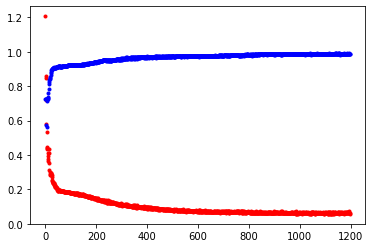

In [58]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)

plt.show()

In [59]:
from keras.models import load_model
model.save('09-1.4809.hdf5')
model= load_model('09-1.4809.hdf5')

#학습할 데이터 설정
df = pd.read_csv('wine.csv', header = None)
X =df.values[:,0:12]
Y =df.values[:,12]

#평가
print(model.evaluate(X,Y))

204/204 [==============================] - 0s 413us/step - loss: 0.0691 - acc: 0.9815
[0.06913361698389053, 0.981529951095581]


### train, test 데이터 8.5:1.5로 분리해서 모델설정

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)


df = pd.read_csv('wine.csv', header=None)
df_pre = np.loadtxt('wine.csv', delimiter=',')

train, test = train_test_split(df, test_size=0.15)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

x_train = train_arr[:, 0:12]
y_train = train_arr[:, 12]
x_test = test_arr[:,0:12]
y_test = test_arr[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, validation_split=0.2, epochs=1500, batch_size=500)

Epoch 1/1500
9/9 [==============================] - 1s 24ms/step - loss: 4.8874 - acc: 0.7556 - val_loss: 3.4675 - val_acc: 0.7593
Epoch 2/1500
9/9 [==============================] - 0s 4ms/step - loss: 3.0395 - acc: 0.7592 - val_loss: 1.6960 - val_acc: 0.7620
Epoch 3/1500
9/9 [==============================] - 0s 4ms/step - loss: 1.3583 - acc: 0.7764 - val_loss: 0.4899 - val_acc: 0.8661
Epoch 4/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.4005 - acc: 0.8647 - val_loss: 0.4538 - val_acc: 0.7747
Epoch 5/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.3716 - acc: 0.8200 - val_loss: 0.2994 - val_acc: 0.9086
Epoch 6/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.2824 - acc: 0.9112 - val_loss: 0.3016 - val_acc: 0.9140
Epoch 7/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.2661 - acc: 0.9105 - val_loss: 0.2850 - val_acc: 0.9014
Epoch 8/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.2595 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.1387 - acc: 0.9454 - val_loss: 0.1388 - val_acc: 0.9538
Epoch 64/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1333 - acc: 0.9524 - val_loss: 0.1375 - val_acc: 0.9538
Epoch 65/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1289 - acc: 0.9542 - val_loss: 0.1365 - val_acc: 0.9538
Epoch 66/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1333 - acc: 0.9530 - val_loss: 0.1347 - val_acc: 0.9538
Epoch 67/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1216 - acc: 0.9554 - val_loss: 0.1330 - val_acc: 0.9538
Epoch 68/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1272 - acc: 0.9529 - val_loss: 0.1318 - val_acc: 0.9538
Epoch 69/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1269 - acc: 0.9530 - val_loss: 0.1313 - val_acc: 0.9538
Epoch 70/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.1286 - acc: 0.9530 - v

9/9 [==============================] - 0s 4ms/step - loss: 0.0883 - acc: 0.9698 - val_loss: 0.0905 - val_acc: 0.9701
Epoch 126/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0929 - acc: 0.9723 - val_loss: 0.0930 - val_acc: 0.9620
Epoch 127/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0951 - acc: 0.9687 - val_loss: 0.0917 - val_acc: 0.9656
Epoch 128/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0915 - acc: 0.9692 - val_loss: 0.0890 - val_acc: 0.9692
Epoch 129/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0844 - acc: 0.9706 - val_loss: 0.0888 - val_acc: 0.9674
Epoch 130/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0864 - acc: 0.9723 - val_loss: 0.0895 - val_acc: 0.9665
Epoch 131/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0860 - acc: 0.9720 - val_loss: 0.0880 - val_acc: 0.9674
Epoch 132/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0892 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0715 - acc: 0.9793 - val_loss: 0.0697 - val_acc: 0.9792
Epoch 188/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0688 - acc: 0.9796 - val_loss: 0.0691 - val_acc: 0.9738
Epoch 189/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0689 - acc: 0.9803 - val_loss: 0.0716 - val_acc: 0.9756
Epoch 190/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0669 - acc: 0.9798 - val_loss: 0.0696 - val_acc: 0.9738
Epoch 191/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0702 - acc: 0.9803 - val_loss: 0.0684 - val_acc: 0.9729
Epoch 192/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0623 - acc: 0.9823 - val_loss: 0.0678 - val_acc: 0.9738
Epoch 193/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0705 - acc: 0.9773 - val_loss: 0.0698 - val_acc: 0.9747
Epoch 194/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0640 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0647 - acc: 0.9803 - val_loss: 0.0606 - val_acc: 0.9765
Epoch 250/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0634 - acc: 0.9810 - val_loss: 0.0654 - val_acc: 0.9756
Epoch 251/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0595 - acc: 0.9800 - val_loss: 0.0600 - val_acc: 0.9783
Epoch 252/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0604 - acc: 0.9807 - val_loss: 0.0590 - val_acc: 0.9810
Epoch 253/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0570 - acc: 0.9818 - val_loss: 0.0590 - val_acc: 0.9819
Epoch 254/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0623 - acc: 0.9805 - val_loss: 0.0596 - val_acc: 0.9783
Epoch 255/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0613 - acc: 0.9812 - val_loss: 0.0603 - val_acc: 0.9783
Epoch 256/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0587 - acc: 0.9831 - val_loss: 0.0552 - val_acc: 0.9792
Epoch 312/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0616 - acc: 0.9791 - val_loss: 0.0600 - val_acc: 0.9774
Epoch 313/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0525 - acc: 0.9847 - val_loss: 0.0561 - val_acc: 0.9792
Epoch 314/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0576 - acc: 0.9808 - val_loss: 0.0540 - val_acc: 0.9846
Epoch 315/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0515 - acc: 0.9826 - val_loss: 0.0532 - val_acc: 0.9819
Epoch 316/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0570 - acc: 0.9839 - val_loss: 0.0595 - val_acc: 0.9783
Epoch 317/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0492 - acc: 0.9840 - val_loss: 0.0539 - val_acc: 0.9774
Epoch 318/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0588 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0538 - acc: 0.9827 - val_loss: 0.0498 - val_acc: 0.9810
Epoch 374/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0481 - acc: 0.9831 - val_loss: 0.0503 - val_acc: 0.9819
Epoch 375/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - acc: 0.9851 - val_loss: 0.0498 - val_acc: 0.9837
Epoch 376/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0502 - acc: 0.9843 - val_loss: 0.0502 - val_acc: 0.9837
Epoch 377/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0548 - acc: 0.9830 - val_loss: 0.0495 - val_acc: 0.9819
Epoch 378/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - acc: 0.9822 - val_loss: 0.0514 - val_acc: 0.9792
Epoch 379/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0514 - acc: 0.9822 - val_loss: 0.0511 - val_acc: 0.9792
Epoch 380/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0562 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0567 - val_acc: 0.9810
Epoch 436/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0593 - acc: 0.9828 - val_loss: 0.0519 - val_acc: 0.9810
Epoch 437/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0542 - acc: 0.9819 - val_loss: 0.0479 - val_acc: 0.9810
Epoch 438/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0421 - acc: 0.9855 - val_loss: 0.0479 - val_acc: 0.9855
Epoch 439/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0485 - val_acc: 0.9837
Epoch 440/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0522 - acc: 0.9846 - val_loss: 0.0482 - val_acc: 0.9837
Epoch 441/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0486 - acc: 0.9862 - val_loss: 0.0477 - val_acc: 0.9846
Epoch 442/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0507 - acc: 0.9849 - val_loss: 0.0485 - val_acc: 0.9864
Epoch 498/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0516 - acc: 0.9849 - val_loss: 0.0464 - val_acc: 0.9864
Epoch 499/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0535 - acc: 0.9840 - val_loss: 0.0464 - val_acc: 0.9810
Epoch 500/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0452 - acc: 0.9850 - val_loss: 0.0465 - val_acc: 0.9810
Epoch 501/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0464 - acc: 0.9839 - val_loss: 0.0478 - val_acc: 0.9792
Epoch 502/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0468 - acc: 0.9874 - val_loss: 0.0476 - val_acc: 0.9846
Epoch 503/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0501 - val_acc: 0.9846
Epoch 504/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0496 - acc: 0.9

Epoch 559/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0475 - acc: 0.9857 - val_loss: 0.0482 - val_acc: 0.9855
Epoch 560/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0433 - acc: 0.9855 - val_loss: 0.0474 - val_acc: 0.9855
Epoch 561/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0456 - acc: 0.9856 - val_loss: 0.0471 - val_acc: 0.9846
Epoch 562/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0529 - acc: 0.9823 - val_loss: 0.0459 - val_acc: 0.9837
Epoch 563/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0426 - acc: 0.9868 - val_loss: 0.0475 - val_acc: 0.9783
Epoch 564/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0400 - acc: 0.9865 - val_loss: 0.0499 - val_acc: 0.9801
Epoch 565/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0537 - acc: 0.9839 - val_loss: 0.0517 - val_acc: 0.9810
Epoch 566/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.

9/9 [==============================] - 0s 4ms/step - loss: 0.0436 - acc: 0.9865 - val_loss: 0.0459 - val_acc: 0.9801
Epoch 622/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0470 - val_acc: 0.9855
Epoch 623/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0453 - val_acc: 0.9855
Epoch 624/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0411 - acc: 0.9862 - val_loss: 0.0463 - val_acc: 0.9792
Epoch 625/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0454 - acc: 0.9855 - val_loss: 0.0456 - val_acc: 0.9819
Epoch 626/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - acc: 0.9863 - val_loss: 0.0459 - val_acc: 0.9792
Epoch 627/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0465 - acc: 0.9848 - val_loss: 0.0465 - val_acc: 0.9801
Epoch 628/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0442 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0455 - val_acc: 0.9819
Epoch 684/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0487 - acc: 0.9876 - val_loss: 0.0462 - val_acc: 0.9855
Epoch 685/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.9870 - val_loss: 0.0460 - val_acc: 0.9819
Epoch 686/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - acc: 0.9864 - val_loss: 0.0493 - val_acc: 0.9864
Epoch 687/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0436 - acc: 0.9866 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 688/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0399 - acc: 0.9879 - val_loss: 0.0483 - val_acc: 0.9855
Epoch 689/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.0506 - val_acc: 0.9864
Epoch 690/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0453 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0374 - acc: 0.9888 - val_loss: 0.0478 - val_acc: 0.9873
Epoch 746/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - acc: 0.9866 - val_loss: 0.0457 - val_acc: 0.9864
Epoch 747/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0424 - acc: 0.9879 - val_loss: 0.0474 - val_acc: 0.9801
Epoch 748/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0452 - acc: 0.9859 - val_loss: 0.0504 - val_acc: 0.9792
Epoch 749/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0478 - acc: 0.9852 - val_loss: 0.0465 - val_acc: 0.9792
Epoch 750/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0420 - acc: 0.9876 - val_loss: 0.0470 - val_acc: 0.9801
Epoch 751/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.9831 - val_loss: 0.0462 - val_acc: 0.9792
Epoch 752/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0402 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0385 - acc: 0.9900 - val_loss: 0.0465 - val_acc: 0.9846
Epoch 808/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0378 - acc: 0.9875 - val_loss: 0.0464 - val_acc: 0.9810
Epoch 809/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0333 - acc: 0.9902 - val_loss: 0.0478 - val_acc: 0.9837
Epoch 810/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0364 - acc: 0.9906 - val_loss: 0.0449 - val_acc: 0.9864
Epoch 811/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - acc: 0.9891 - val_loss: 0.0443 - val_acc: 0.9801
Epoch 812/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0425 - acc: 0.9879 - val_loss: 0.0461 - val_acc: 0.9864
Epoch 813/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0366 - acc: 0.9865 - val_loss: 0.0448 - val_acc: 0.9810
Epoch 814/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0399 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0458 - acc: 0.9879 - val_loss: 0.0440 - val_acc: 0.9855
Epoch 870/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0387 - acc: 0.9886 - val_loss: 0.0444 - val_acc: 0.9846
Epoch 871/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - acc: 0.9876 - val_loss: 0.0484 - val_acc: 0.9783
Epoch 872/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0378 - acc: 0.9897 - val_loss: 0.0463 - val_acc: 0.9801
Epoch 873/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0438 - acc: 0.9871 - val_loss: 0.0482 - val_acc: 0.9792
Epoch 874/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0465 - acc: 0.9858 - val_loss: 0.0444 - val_acc: 0.9846
Epoch 875/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0466 - acc: 0.9876 - val_loss: 0.0469 - val_acc: 0.9864
Epoch 876/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0430 - acc: 0.9881 - val_loss: 0.0473 - val_acc: 0.9792
Epoch 932/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0496 - val_acc: 0.9855
Epoch 933/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0385 - acc: 0.9898 - val_loss: 0.0462 - val_acc: 0.9846
Epoch 934/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0364 - acc: 0.9889 - val_loss: 0.0473 - val_acc: 0.9810
Epoch 935/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - acc: 0.9881 - val_loss: 0.0450 - val_acc: 0.9828
Epoch 936/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - acc: 0.9903 - val_loss: 0.0461 - val_acc: 0.9801
Epoch 937/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0448 - val_acc: 0.9819
Epoch 938/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0387 - acc: 0.9

9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - acc: 0.9870 - val_loss: 0.0467 - val_acc: 0.9837
Epoch 994/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - acc: 0.9914 - val_loss: 0.0465 - val_acc: 0.9855
Epoch 995/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0354 - acc: 0.9896 - val_loss: 0.0475 - val_acc: 0.9837
Epoch 996/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0364 - acc: 0.9909 - val_loss: 0.0477 - val_acc: 0.9792
Epoch 997/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - acc: 0.9910 - val_loss: 0.0469 - val_acc: 0.9810
Epoch 998/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0377 - acc: 0.9911 - val_loss: 0.0447 - val_acc: 0.9864
Epoch 999/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0363 - acc: 0.9905 - val_loss: 0.0468 - val_acc: 0.9864
Epoch 1000/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0379 - acc: 0.

Epoch 1055/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0383 - acc: 0.9902 - val_loss: 0.0469 - val_acc: 0.9864
Epoch 1056/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - acc: 0.9890 - val_loss: 0.0470 - val_acc: 0.9864
Epoch 1057/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0298 - acc: 0.9923 - val_loss: 0.0462 - val_acc: 0.9864
Epoch 1058/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0355 - acc: 0.9914 - val_loss: 0.0476 - val_acc: 0.9828
Epoch 1059/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0367 - acc: 0.9890 - val_loss: 0.0467 - val_acc: 0.9837
Epoch 1060/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - acc: 0.9915 - val_loss: 0.0492 - val_acc: 0.9801
Epoch 1061/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0352 - acc: 0.9914 - val_loss: 0.0478 - val_acc: 0.9864
Epoch 1062/1500
9/9 [==============================] - 0s 4ms/step - 

9/9 [==============================] - 0s 4ms/step - loss: 0.0360 - acc: 0.9898 - val_loss: 0.0485 - val_acc: 0.9882
Epoch 1117/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - acc: 0.9922 - val_loss: 0.0548 - val_acc: 0.9873
Epoch 1118/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - acc: 0.9890 - val_loss: 0.0490 - val_acc: 0.9882
Epoch 1119/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - acc: 0.9934 - val_loss: 0.0482 - val_acc: 0.9882
Epoch 1120/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0366 - acc: 0.9911 - val_loss: 0.0499 - val_acc: 0.9792
Epoch 1121/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - acc: 0.9902 - val_loss: 0.0538 - val_acc: 0.9783
Epoch 1122/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0439 - acc: 0.9890 - val_loss: 0.0502 - val_acc: 0.9792
Epoch 1123/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - a

Epoch 1178/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0357 - acc: 0.9906 - val_loss: 0.0517 - val_acc: 0.9783
Epoch 1179/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0481 - val_acc: 0.9882
Epoch 1180/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0373 - acc: 0.9920 - val_loss: 0.0485 - val_acc: 0.9882
Epoch 1181/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0279 - acc: 0.9930 - val_loss: 0.0498 - val_acc: 0.9891
Epoch 1182/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0323 - acc: 0.9910 - val_loss: 0.0481 - val_acc: 0.9846
Epoch 1183/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - acc: 0.9909 - val_loss: 0.0482 - val_acc: 0.9855
Epoch 1184/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - acc: 0.9911 - val_loss: 0.0486 - val_acc: 0.9873
Epoch 1185/1500
9/9 [==============================] - 0s 4ms/step - 

9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - acc: 0.9910 - val_loss: 0.0528 - val_acc: 0.9873
Epoch 1240/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0365 - acc: 0.9902 - val_loss: 0.0502 - val_acc: 0.9873
Epoch 1241/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9819
Epoch 1242/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0301 - acc: 0.9922 - val_loss: 0.0497 - val_acc: 0.9837
Epoch 1243/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0531 - val_acc: 0.9765
Epoch 1244/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0447 - acc: 0.9891 - val_loss: 0.0490 - val_acc: 0.9846
Epoch 1245/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0343 - acc: 0.9908 - val_loss: 0.0510 - val_acc: 0.9828
Epoch 1246/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0393 - a

Epoch 1301/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - acc: 0.9915 - val_loss: 0.0509 - val_acc: 0.9873
Epoch 1302/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - acc: 0.9914 - val_loss: 0.0496 - val_acc: 0.9873
Epoch 1303/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0338 - acc: 0.9917 - val_loss: 0.0609 - val_acc: 0.9783
Epoch 1304/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - acc: 0.9901 - val_loss: 0.0505 - val_acc: 0.9864
Epoch 1305/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0373 - acc: 0.9895 - val_loss: 0.0500 - val_acc: 0.9864
Epoch 1306/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.0499 - val_acc: 0.9864
Epoch 1307/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0329 - acc: 0.9926 - val_loss: 0.0538 - val_acc: 0.9882
Epoch 1308/1500
9/9 [==============================] - 0s 4ms/step - 

9/9 [==============================] - 0s 4ms/step - loss: 0.0349 - acc: 0.9921 - val_loss: 0.0492 - val_acc: 0.9873
Epoch 1363/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - acc: 0.9923 - val_loss: 0.0513 - val_acc: 0.9873
Epoch 1364/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0324 - acc: 0.9908 - val_loss: 0.0567 - val_acc: 0.9873
Epoch 1365/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0301 - acc: 0.9928 - val_loss: 0.0531 - val_acc: 0.9873
Epoch 1366/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0389 - acc: 0.9917 - val_loss: 0.0504 - val_acc: 0.9873
Epoch 1367/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0295 - acc: 0.9923 - val_loss: 0.0540 - val_acc: 0.9783
Epoch 1368/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0290 - acc: 0.9928 - val_loss: 0.0515 - val_acc: 0.9846
Epoch 1369/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0329 - a

Epoch 1424/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0385 - acc: 0.9894 - val_loss: 0.0541 - val_acc: 0.9801
Epoch 1425/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0388 - acc: 0.9889 - val_loss: 0.0519 - val_acc: 0.9864
Epoch 1426/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - acc: 0.9925 - val_loss: 0.0569 - val_acc: 0.9765
Epoch 1427/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0296 - acc: 0.9909 - val_loss: 0.0550 - val_acc: 0.9810
Epoch 1428/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0558 - val_acc: 0.9792
Epoch 1429/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - acc: 0.9935 - val_loss: 0.0524 - val_acc: 0.9864
Epoch 1430/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0255 - acc: 0.9935 - val_loss: 0.0540 - val_acc: 0.9864
Epoch 1431/1500
9/9 [==============================] - 0s 4ms/step - 

9/9 [==============================] - 0s 4ms/step - loss: 0.0408 - acc: 0.9909 - val_loss: 0.0508 - val_acc: 0.9846
Epoch 1486/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0256 - acc: 0.9932 - val_loss: 0.0515 - val_acc: 0.9873
Epoch 1487/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0260 - acc: 0.9939 - val_loss: 0.0516 - val_acc: 0.9855
Epoch 1488/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0359 - acc: 0.9907 - val_loss: 0.0513 - val_acc: 0.9855
Epoch 1489/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - acc: 0.9904 - val_loss: 0.0519 - val_acc: 0.9837
Epoch 1490/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0354 - acc: 0.9913 - val_loss: 0.0528 - val_acc: 0.9846
Epoch 1491/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - acc: 0.9921 - val_loss: 0.0564 - val_acc: 0.9792
Epoch 1492/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0314 - a

In [64]:
print(model.evaluate(X_test, y_test)[1])

31/31 [==============================] - 0s 484us/step - loss: 0.0821 - acc: 0.9897
0.9897435903549194


In [63]:
X_test = test_arr[:, 0:12]

prediction = model.predict(X_test)
prediction

array([[5.16235828e-04],
       [9.99931872e-01],
       [9.99995172e-01],
       [5.01424074e-04],
       [9.99994755e-01],
       [1.31956637e-02],
       [9.93492365e-01],
       [1.00000000e+00],
       [3.23593616e-04],
       [1.60650313e-06],
       [9.99919653e-01],
       [1.22823098e-04],
       [1.23441219e-04],
       [9.99760628e-01],
       [5.78663349e-02],
       [4.32463651e-07],
       [5.37675619e-03],
       [9.97775435e-01],
       [5.58452348e-06],
       [1.22396946e-02],
       [2.99334526e-04],
       [9.99901056e-01],
       [9.99974191e-01],
       [3.92638831e-05],
       [9.03129985e-05],
       [3.97283402e-05],
       [8.67661470e-07],
       [9.94635344e-01],
       [9.99994516e-01],
       [4.39624137e-06],
       [3.98129225e-04],
       [9.99978662e-01],
       [2.65598297e-04],
       [7.91828930e-02],
       [1.03409290e-02],
       [2.20366906e-06],
       [4.81903553e-04],
       [8.38023424e-03],
       [9.99993086e-01],
       [1.29451752e-02],
